<a href="https://colab.research.google.com/github/raha86/Random_Forest_Classifier_Customer_churn_prediction/blob/main/Random_Forest_Classifier_Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Table of Contents**

1. [Business Problem and Dataset Information](#1)
2. [Data Exploration](#2)
3. [Data Cleaning](#3)
4. [Data Visualization](#4)
5. [Conclusion from Data Analysis](#5)
6. [Feature Selection](#6)
  * [Chi-Square Test](#1)
7. [Feature Engineering](#7)
  * [Label Encoding](#1)
  * [Train Test Split](#2)
  * [Data Oversampling using SMOTE](#3)
8. [Model Building](#8)
9. [Model Evaluation](#9)
10. [Hyperparameter Tuning](#10)






# **Business Problem**

In the Telecom sector, a massive amount of data is being generated on a day by day foundation because of a sizable customer base.Decision makers and commercial enterprise analysts emphasized that achieving new clients is deared than maintaining the present ones. Business analysts and purchaser dating management analyzers want to recognize the reason behind churning clients.

# **About Dataset**
### **Context**
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

### **Content**
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

### **The data set includes information about:**

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

## **Data Exploration**

In [ ]:
churn_data = pd.read_csv('/content/drive/MyDrive/ML Notebooks/Random_Forest_Classifier_Customer_Churn_Prediction/customer_churn.csv')
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
pd.set_option('display.max_columns', None)
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
churn_data.shape

(7043, 21)

In [ ]:
churn_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
churn_data.describe(include='O')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


## **Data Cleaning**

In [ ]:
# changing the data type of 'total charges' to numeric
churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'], errors='coerce')
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
churn_data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# removing customer id as it is of no use for the analysis
churn_data.drop('customerID', axis=1, inplace=True)

In [ ]:
# removing rows where tenure = 0
churn_data.drop(churn_data[churn_data['tenure']==0].index, axis = 0, inplace=True)

In [ ]:
churn_data.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


# **Data Visualization**

In [ ]:
churn_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
churn_data['Churn'].value_counts()

,count
Churn,
No,5163
Yes,1869


***imbalanced data***

### ***Churn Distribution w.r.t Contract***

In [ ]:
churn_data[churn_data['Churn']=='Yes']['Contract'].value_counts(normalize=True) * 100

,proportion
Contract,
Month-to-month,88.550027
One year,8.881755
Two year,2.568218


In [ ]:
fig = px.histogram(churn_data, x="Churn", color="Contract", barmode="group", title="<b>Churn Distribution w.r.t Contract<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

**Interpretation**
* 75% of customer who have Month-to-Month Contract have opted to move out as compared to 13% of customers  who have signed One Year Contract and 3% of customers  who have signed Two Year Contract.

### ***Churn Distrbution w.r.t payment method***

In [ ]:
churn_data[churn_data['Churn']=='Yes']['PaymentMethod'].value_counts(normalize=True) * 100

,proportion
PaymentMethod,
Electronic check,57.303371
Mailed check,16.479401
Bank transfer (automatic),13.804173
Credit card (automatic),12.413055


In [ ]:
fig = px.histogram(churn_data, x="Churn", color="PaymentMethod", title="<b>Churn distribution w.r.t. Customer Payment Method</b>",text_auto=True)
fig.update_layout(width=700, height=500, bargap=0.1)

**Interpretation**
* Majority of the customers who moved out were having Electronic Check as Payment Method and others who opted for Credit-Card automatic transfer / Bank Automatic Transfer and Mailed Check as Payment Method were less likely to switch.

### ***Churn Distribution w.r.t Gender and Internet Service***

In [ ]:
male_churn=churn_data[churn_data['gender']=='Male'][['InternetService', 'Churn']]
male_churn.value_counts()

,,count
InternetService,Churn,
DSL,No,992
Fiber optic,No,910
No,No,717
Fiber optic,Yes,633
DSL,Yes,240
No,Yes,57


In [ ]:
female_churn=churn_data[churn_data['gender']=='Female'][['InternetService', 'Churn']]
female_churn.value_counts()

,,count
InternetService,Churn,
DSL,No,965
Fiber optic,No,889
No,No,690
Fiber optic,Yes,664
DSL,Yes,219
No,Yes,56


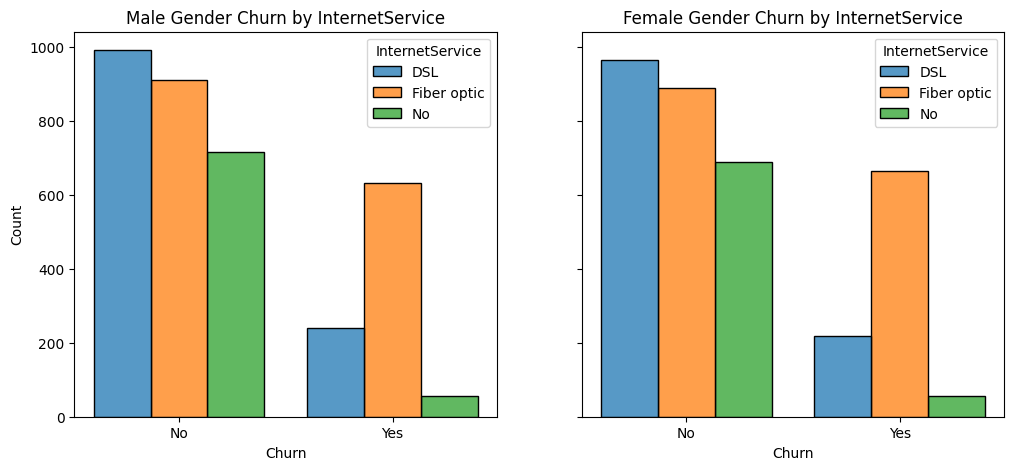

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Male churn histogram
sns.histplot(data=male_churn, x='Churn', hue='InternetService', multiple='dodge', shrink=0.8, ax=axes[0])
axes[0].set_title('Male Gender Churn by InternetService')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)

# Female churn histogram
sns.histplot(data=female_churn, x='Churn', hue='InternetService', multiple='dodge', shrink=0.8, ax=axes[1])
axes[1].set_title('Female Gender Churn by InternetService')
axes[1].set_xlabel('Churn')
axes[1].set_ylabel('')
axes[1].tick_params(axis='x', rotation=0)

**Interpretation**
* No specific gender engagement in terms of churn. But customers having Fiber Optic internet services are more likely to churn out.

### ***Churn Distribution w.r.t Dependents***

In [ ]:
fig = px.histogram(churn_data, x="Churn", color="Dependents", barmode="group", title="<b>Churn distribution w.r.t. Dependents</b>", )
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

**Interpretation**
* Customers without dependents are more likely to churn

### ***Churn distribution w.r.t Partners***

In [ ]:
fig = px.histogram(churn_data, x="Churn", color="Partner", barmode="group", title="<b>Churn distribution w.r.t. Partners</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

**Interpretation**
* Customers without partners are more likely to churn

### ***Churn Distribution w.r.t Online Security***

In [ ]:
fig = px.histogram(churn_data, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

**Interpretation**
* Absence of Online Security makes most customers churn.

### ***Churn Distribution w.r.t Tech Support***

In [ ]:
fig = px.histogram(churn_data, y="Churn", color="TechSupport",barmode="group",  title="<b>Churn distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

**Interpretation**
* Absence of tech support makes most of the customers churn out.

## **Conclusion from Data Analysis**
---
* 75% of customer who have Month-to-Month Contract have opted to move out as compared to 13% of customers who have signed One Year Contract and 3% of customers who have signed Two Year Contract.
* Majority of the customers who moved out were having Electronic Check as Payment Method and others who opted for Credit-Card automatic transfer / Bank Automatic Transfer and Mailed Check as Payment Method were less likely to switch.
* Fiber optic service which was choosen by a lot of customers and it's evident that there's high churn rate among these customers. This could expose an issue in the Fiber optic service which dissatisfied most of it's customers, further looking into the issue might find a better and apt solution.
* Customers who opted for DSL service are larger in number and is found to have less churn rate compared to Fibre optic service
* Customers without dependents and customers who have partners are more likely to churn while senior citizens being the most of churn.
* The absence of online security, Paperless Billing system and services with no TechSupport were the similiar trend are of the customers who are most likely churn.
* There's a small fraction of customers who are more likely to churn and it's been found that they don't have a phone service.

## **Feature Selection**

**seeing the correlation**

<Axes: >

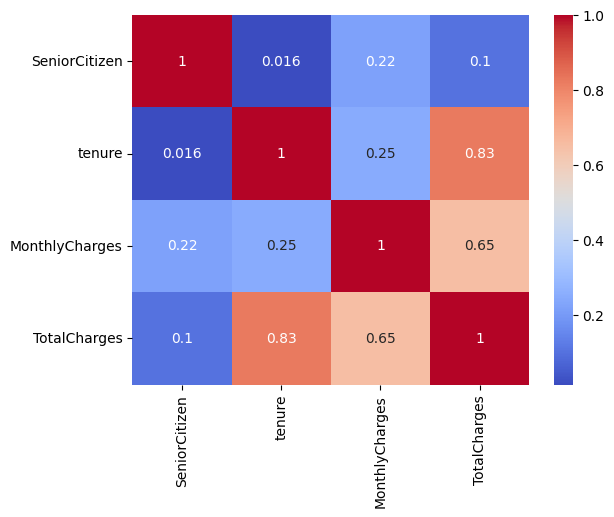

In [ ]:
sns.heatmap(churn_data.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')

## **Chi2 Test**



Here we are going to implement chi-square test to select the relevant features.

Chi-square test is normally done on categorical data, where we'll select each indivisual attribute and calculate chi-square statistics value with the help of observed value.

if obsered and expected values are close, then we'll have high chi-square statistics (attributes are highly independant).

with the above concept we'll set null and alternate hypothesis and check for its acceptance and rejection through p-value and alpha-value.

if p-value < alpha-value, we accept null hypothesis

if p-value >= alpha-value, we reject null hypothesis

p-value should be < 0.05 for feature acceptance

In [ ]:
import scipy.stats
from scipy.stats import chisquare
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [ ]:
col_list = list(churn_data.columns)
# removing churn as it is target variable
col_list.remove('Churn')

In [ ]:
results = []
for col in col_list:
  if churn_data[col].dtype == 'object':
    # chi-sq test for independence
    dataset_table = pd.crosstab(churn_data[col], churn_data['Churn'])

    # Performing chi-sq statistics
    chi2, p, dof, expected = chi2_contingency(dataset_table.values)
    results.append({'Feature': col, 'P-value': p})

df = pd.DataFrame(results)
df

,Feature,P-value
0,gender,4.904885e-01
1,Partner,3.973798e-36
2,Dependents,2.019659e-42
3,PhoneService,3.499240e-01
4,MultipleLines,3.567927e-03
5,InternetService,5.831199e-159
6,OnlineSecurity,1.400687e-184
7,OnlineBackup,7.776099e-131
8,DeviceProtection,1.959389e-121
9,TechSupport,7.407808e-180


In [ ]:
df['P-value'] = df['P-value'].apply(lambda x: '{:.6f}'.format(x))

In [ ]:
df

,Feature,P-value
0,gender,0.490488
1,Partner,0.000000
2,Dependents,0.000000
3,PhoneService,0.349924
4,MultipleLines,0.003568
5,InternetService,0.000000
6,OnlineSecurity,0.000000
7,OnlineBackup,0.000000
8,DeviceProtection,0.000000
9,TechSupport,0.000000


deleting columns from churn_data having p value >= 0.05

In [ ]:
churn_data.drop(columns = 'gender', inplace = True)

In [ ]:
churn_data.drop(columns = 'PhoneService', inplace= True)

In [ ]:
churn_data['Churn'].value_counts(normalize=True)

,proportion
Churn,
No,0.734215
Yes,0.265785


***The data is imbalanced***

## **Feature Engineering**
Here we are performing **Label Encoding** to convert all object columns to numeric columns

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in churn_data.columns:
  if churn_data[col].dtype == 'object':
    churn_data[col] = le.fit_transform(churn_data[col])

In [ ]:
x = churn_data.iloc[:,:-1]
y = churn_data.iloc[:,-1]

## **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### **Data Oversampling**

We'll be using SMOTE to oversample the train dataset as the dataset is imbalanced.

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [ ]:
y_train_resampled.value_counts()

,count
Churn,
1,4130
0,4130


# **Model Building**

### **Fitting data to the model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rfc.predict(x_test)

## **Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [ ]:
acc_score = accuracy_score(y_test, y_pred)
print(f'Accuracy Score : {acc_score}')

Accuracy Score : 0.7633262260127932


In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix : \n{conf_mat}')

Confusion Matrix : 
[[861 172]
 [161 213]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1033
           1       0.55      0.57      0.56       374

    accuracy                           0.76      1407
   macro avg       0.70      0.70      0.70      1407
weighted avg       0.77      0.76      0.76      1407



## **Hyperparameter Tuning**

**n_estimators:**	Number of trees in the forest (default: 100) <br>
**criterion:**	Function to measure the quality of a split: 'gini' (default) or 'entropy' <br>
**max_depth:** Maximum depth of each tree. Prevents overfitting <br>
**min_samples_split:** Minimum samples to split an internal node (default: 2)<br>
**min_samples_leaf:** Minimum samples at a leaf node (default: 1)<br>
**max_features:**	Number of features to consider when looking for the best split (e.g., 'sqrt', 'log2', None)<br>
**bootstrap:** Whether bootstrap samples are used (default: True)<br>
**random_state:**	Random seed for reproducibility<br>
**n_jobs:**	Number of CPU cores used during training (-1 = all cores)<br>

In [ ]:
# seeing used hyperparameters
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

There are two techniques for hyper parameter tuning :

    1. RandomizedSearchCV
    2. GridSearchCV
    
For our model we will be implementing  RandomizedSearchCV method and tune our model

In [ ]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 800, num = 10)] # 200,210,220,230,240,250 ................. 800
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 80, num = 16)] # 10, 20, 30, ......80
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(2, 20, num = 10)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 7, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 266, 333, 400, 466, 533, 600, 666, 733, 800], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 14, 19, 24, 28, 33, 38, 42, 47, 52, 56, 61, 66, 70, 75, 80, None], 'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20], 'min_samples_leaf': [1, 2, 4, 7, 10], 'bootstrap': [True, False]}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rfc_random = RandomizedSearchCV(estimator=rfc, param_distributions=random_grid,
                              n_iter = 10, scoring='neg_mean_absolute_error',
                              cv = 2, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

In [ ]:
rfc_tuned = rfc_random.fit(x_train_resampled, y_train_resampled)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning:


4 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_p

In [ ]:
rfc_tuned.best_params_

{'n_estimators': 333,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 66,
 'bootstrap': False}

In [ ]:
y_pred_tuned = rfc_tuned.predict(x_test)

In [ ]:
acc_score_tuned = accuracy_score(y_test, y_pred_tuned)
print(f'Accuracy Score - After Hyperparameter Tuning: {acc_score_tuned}')

Accuracy Score - After Hyperparameter Tuning: 0.7711442786069652


In [ ]:
conf_mat_tuned = confusion_matrix(y_test, y_pred_tuned)
print(f'Confusion Matrix : \n{conf_mat_tuned}')

Confusion Matrix : 
[[852 181]
 [141 233]]
